In [ ]:
1.) Clean 
2.) Explore
3.) PCA
4.) Conclusion based on correlations

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

path = "C:/Users/Phillip/Pictures/Box Sync/My Python Programs/Data Science/Lessons/life-expectancy-who/Life Expectancy Data.csv"
life_df = pd.read_csv(path)

## Data Clean 

What missing values are present?  What needs attention before moving forward?

In [211]:
life_df.isnull().sum()*100/life_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

life_df['Hepatitis B'] is almost 20% null. GDP is 15% null, Population figures are 22% null

In [3]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [212]:
#column  label  clean up
life_df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [213]:
#using interpolation to fix null values then drop remaining after inter.

fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

for col in fill_list:
    life_df.loc[:, col] = life_df.loc[:, col].fillna(life_df.loc[:, col].interpolate())

In [214]:
life_df.dropna(inplace=True)

In [215]:
life_df.isnull().sum()*100/life_df.isnull().count()

Country                     0.0
Year                        0.0
Status                      0.0
Life_Expectancy             0.0
Adult_Mortality             0.0
Infant_Deaths               0.0
Alcohol                     0.0
Percentage_Exp              0.0
HepatitisB                  0.0
Measles                     0.0
BMI                         0.0
Under_Five_Deaths           0.0
Polio                       0.0
Tot_Exp                     0.0
Diphtheria                  0.0
HIV/AIDS                    0.0
GDP                         0.0
Population                  0.0
thinness_1to19_years        0.0
thinness_5to9_years         0.0
Income_Comp_Of_Resources    0.0
Schooling                   0.0
dtype: float64

In [14]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

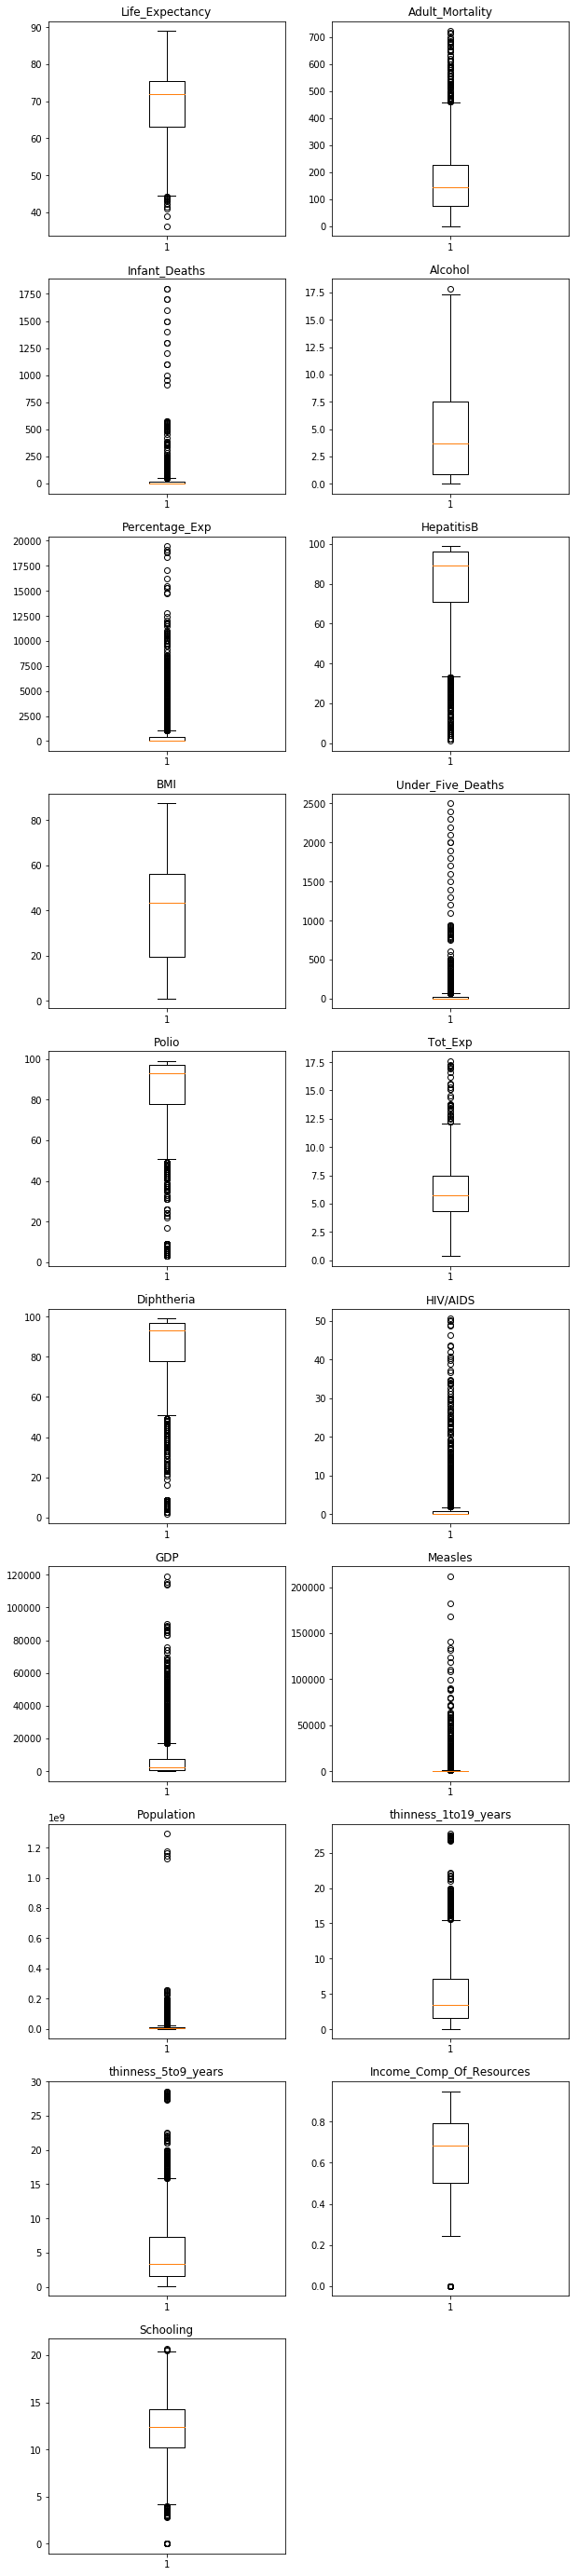

In [28]:
#treating ouliers per variable
columns_for_box = {'Life_Expectancy':1, 'Adult_Mortality':2,
       'Infant_Deaths':3, 'Alcohol':4, 'Percentage_Exp':5, 'HepatitisB':6, 'Measles':14,
       'BMI':7, 'Under_Five_Deaths':8, 'Polio':9, 'Tot_Exp':10, 'Diphtheria':11,
       'HIV/AIDS':12, 'GDP':13, 'Population':15, 'thinness_1to19_years':16,
       'thinness_5to9_years':17, 'Income_Comp_Of_Resources':18, 'Schooling':19}
plt.figure(figsize=(10,50))
for items, i in columns_for_box.items():
    plt.subplot(10,2,i)
    plt.boxplot(life_df[items], whis=1.5)
    plt.title(items)
plt.show()

#bmi only plot with no significant outliers, alcohol with one

In [25]:
for items in columns_for_box.keys():
    q75, q25 = np.percentile(life_df[items], [75,25])
    iqr = q75 - q25
    
    minv = q25 - (iqr*1.5)
    maxv = q75 + (iqr*1.5)
    print("# of outliers and % in {} : {} and {}".format(items,
                                                        len((np.where((life_df[items] > maxv) |
                                                        (life_df[items]<minv))[0])),len((np.where((life_df[items]>maxv) |
                                                        (life_df[items]<minv))[0]))*100/1987))

# of outliers and % in Life_Expectancy : 12 and 0.6039255158530448
# of outliers and % in Adult_Mortality : 82 and 4.12682435832914
# of outliers and % in Infant_Deaths : 315 and 15.853044791142425
# of outliers and % in Alcohol : 1 and 0.050327126321087066
# of outliers and % in Percentage_Exp : 389 and 19.577252138902868
# of outliers and % in HepatitisB : 248 and 12.481127327629592
# of outliers and % in Measles : 542 and 27.27730246602919
# of outliers and % in BMI : 0 and 0.0
# of outliers and % in Under_Five_Deaths : 394 and 19.828887770508302
# of outliers and % in Polio : 282 and 14.192249622546553
# of outliers and % in Tot_Exp : 35 and 1.7614494212380474
# of outliers and % in Diphtheria : 301 and 15.148465022647207
# of outliers and % in HIV/AIDS : 542 and 27.27730246602919
# of outliers and % in GDP : 348 and 17.5138399597383
# of outliers and % in Population : 364 and 18.319073980875693
# of outliers and % in thinness_1to19_years : 89 and 4.479114242576749
# of outliers an

<function matplotlib.pyplot.show(*args, **kw)>

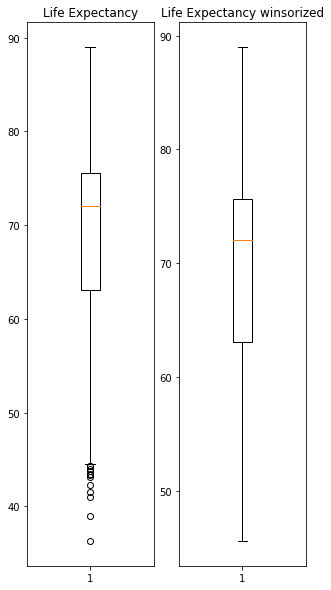

In [35]:
#treating outliers
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
plt.boxplot(life_df['Life_Expectancy'])
plt.title('Life Expectancy')

plt.subplot(1,2,2)
Life_Expectancy_winsorized = winsorize(life_df['Life_Expectancy'],(0.01,0))
plt.boxplot(Life_Expectancy_winsorized)
plt.title('Life Expectancy winsorized')

plt.show


In [40]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
plt.boxplot(life_df['Adult_Mortality'])
plt.title('Adult_Mortality')

plt.subplot(1,2,2)
Adult_Mortality_winsorized = winsorize(life_df['Adult_Mortality'],(0,0.1))
plt.boxplot(Adult_Mortality_winsorized)
plt.title('Adult_Mortality winsorized')

plt.show


<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

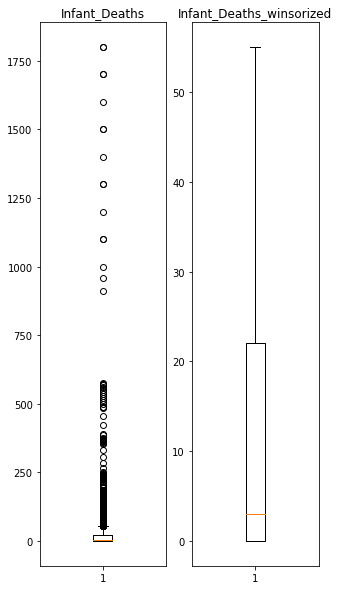

In [141]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
plt.boxplot(life_df['Infant_Deaths'])
plt.title('Infant_Deaths')

plt.subplot(1,2,2)
Infant_Deaths_winsorized = winsorize(life_df['Infant_Deaths'],(0,0.11))
plt.boxplot(Infant_Deaths_winsorized)
plt.title('Infant_Deaths_winsorized')

plt.show


In [52]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
plt.boxplot(life_df['Alcohol'])
plt.title('Alcohol')

plt.subplot(1,2,2)
Alcohol_winsorized = winsorize(life_df['Alcohol'],(0,0.05))
plt.boxplot(Alcohol_winsorized)
plt.title('Alcohol winsorized')

plt.show


<function matplotlib.pyplot.show(*args, **kw)>

In [62]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
original_Percentage_Exp = life_df['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(life_df['Percentage_Exp'],(0,0.14))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

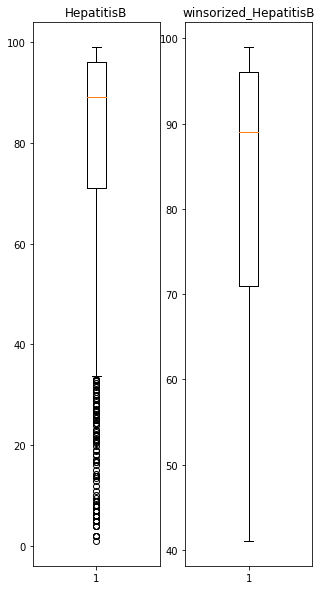

In [66]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
HepatitisB = life_df['HepatitisB']
plt.boxplot(HepatitisB)
plt.title("HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(life_df['HepatitisB'],(.1,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

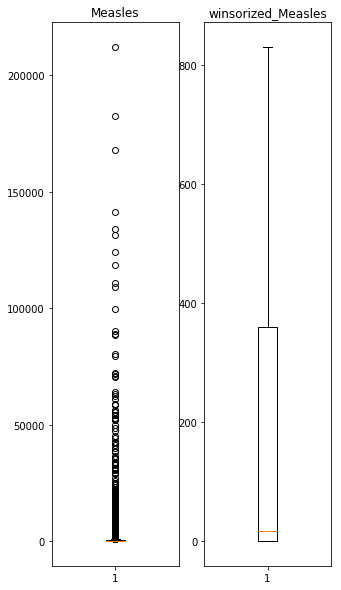

In [74]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
Measles = life_df['Measles']
plt.boxplot(Measles)
plt.title('Measles')

plt.subplot(1,2,2)
winsorized_Measles = winsorize(life_df['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

#this affects a large portion of this data, may be unreliable

In [76]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
BMI = life_df['BMI']
plt.boxplot(BMI)
plt.title('BMI')

plt.subplot(1,2,2)
winsorized_BMI = winsorize(life_df['BMI'],(0,0.0))
plt.boxplot(winsorized_BMI)
plt.title("winsorized_BMI")

plt.show()

In [82]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
Under_Five_Deaths = life_df['Under_Five_Deaths']
plt.boxplot(Under_Five_Deaths)
plt.title('Under_Five_Deaths')

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(life_df['Under_Five_Deaths'],(0,0.14))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

In [90]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
Polio = life_df['Polio']
plt.boxplot(Polio)
plt.title('Polio')

plt.subplot(1,2,2)
winsorized_Polio = winsorize(life_df['Polio'],(0.1,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

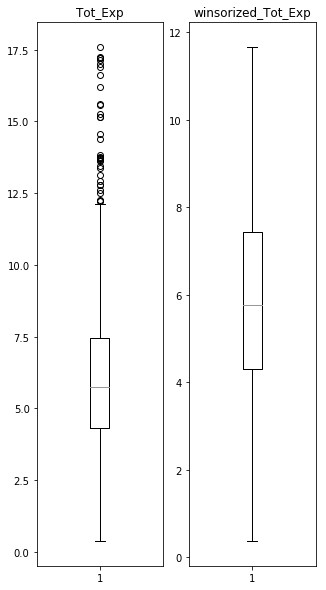

In [98]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
Tot_Exp = life_df['Tot_Exp']
plt.boxplot(Tot_Exp)
plt.title('Tot_Exp')

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(life_df['Tot_Exp'],(0.0,0.02))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

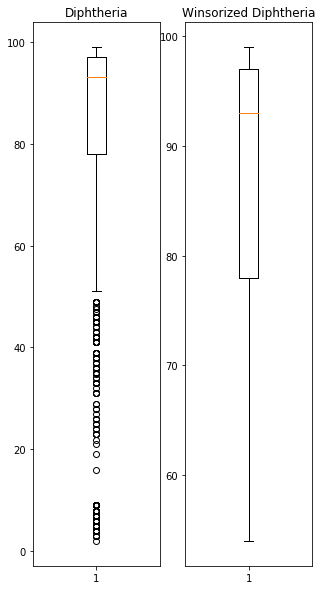

In [117]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
Diphtheria = life_df['Diphtheria']
plt.boxplot(Diphtheria)
plt.title('Diphtheria')

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(life_df['Diphtheria'],(0.11,0.0))
plt.boxplot(winsorized_Diphtheria)
plt.title("Winsorized Diphtheria")

plt.show()

In [116]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
HIV_AIDS = life_df['HIV/AIDS']
plt.boxplot(HIV_AIDS)
plt.title('HIV/AIDS')

plt.subplot(1,2,2)
winsorized_HIV_AIDS = winsorize(life_df['HIV/AIDS'],(0.0,0.19))
plt.boxplot(winsorized_HIV_AIDS)
plt.title(" Winsorized HIV/AIDS")

plt.show()

#also lost a large portion of HIV/AIDS, might not be reliable

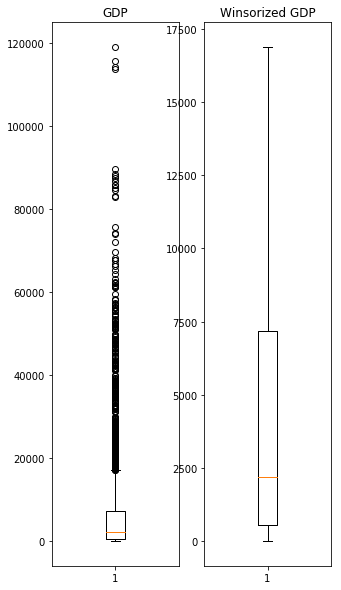

In [115]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
GDP = life_df['GDP']
plt.boxplot(GDP)
plt.title('GDP')

plt.subplot(1,2,2)
winsorized_GDP = winsorize(life_df['GDP'],(0.0,0.12))
plt.boxplot(winsorized_GDP)
plt.title("Winsorized GDP")

plt.show()


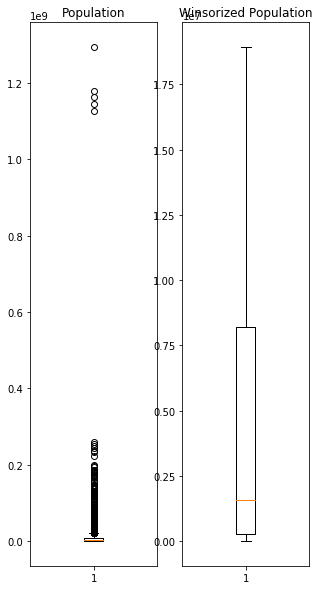

In [119]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
Population = life_df['Population']
plt.boxplot(Population)
plt.title('Population')

plt.subplot(1,2,2)
winsorized_Population = winsorize(life_df['Population'],(0.0,0.13))
plt.boxplot(winsorized_Population)
plt.title("Winsorized Population")

plt.show()
    

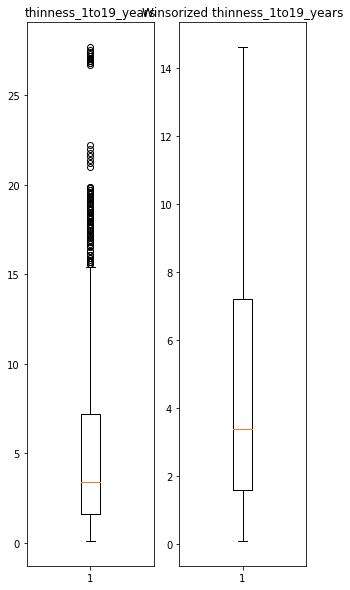

In [126]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
thinness_1to19_years = life_df['thinness_1to19_years']
plt.boxplot(thinness_1to19_years)
plt.title('thinness_1to19_years')

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(life_df['thinness_1to19_years'],(0.0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("Winsorized thinness_1to19_years")

plt.show()
    

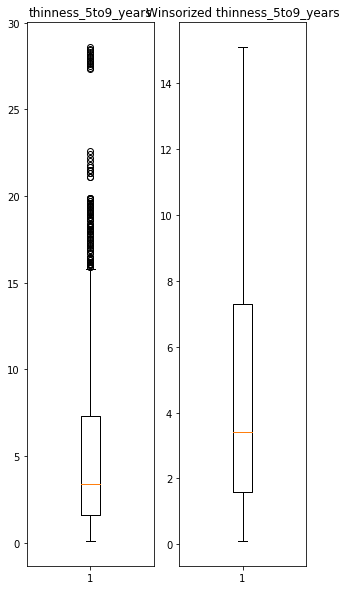

In [130]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
thinness_5to9_years = life_df['thinness_5to9_years']
plt.boxplot(thinness_5to9_years)
plt.title('thinness_5to9_years')

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(life_df['thinness_5to9_years'],(0.0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("Winsorized thinness_5to9_years")

plt.show()
    

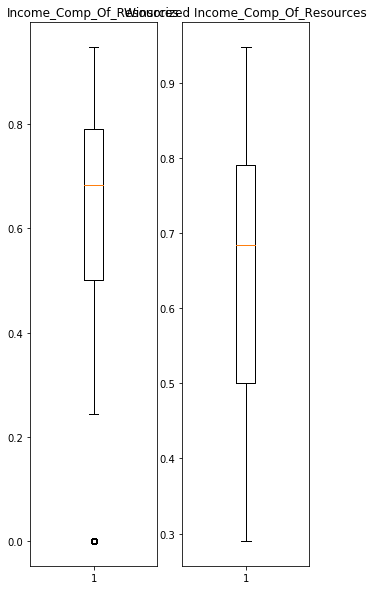

In [134]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
Income_Comp_Of_Resources = life_df['Income_Comp_Of_Resources']
plt.boxplot(Income_Comp_Of_Resources)
plt.title('Income_Comp_Of_Resources')

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(life_df['Income_Comp_Of_Resources'],(0.05,0.00))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("Winsorized Income_Comp_Of_Resources")

plt.show()
    

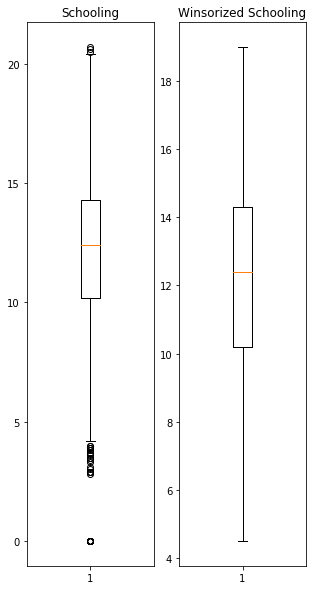

In [137]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
Schooling = life_df['Schooling']
plt.boxplot(Schooling)
plt.title('Schooling')

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(life_df['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("Winsorized Schooling")

plt.show()

In [145]:
win_list = [Life_Expectancy_winsorized,Adult_Mortality_winsorized,Infant_Deaths_winsorized,Alcohol_winsorized,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,
            winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV_AIDS,winsorized_GDP,winsorized_Population,
            winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,
            winsorized_Schooling]

for items in win_list:
    q75, q25 = np.percentile(items, [75,25])
    iqr = q75 - q25
    
    minv = q25 - (iqr*1.5)
    maxv = q75 + (iqr*1.5)
    print("# of outliers after winsorize : {}".format(len(np.where((items>maxv) | (items<minv))[0])))

# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0
# of outliers after winsorize : 0


In [216]:
life_df['Life_Expectancy_winsorized'] = Life_Expectancy_winsorized
life_df['Adult_Mortality_winsorized']=Adult_Mortality_winsorized
life_df['Infant_Deaths_winsorized']=Infant_Deaths_winsorized
life_df['Alcohol_winsorized']=Alcohol_winsorized
life_df['winsorized_Percentage_Exp']=winsorized_Percentage_Exp
life_df['winsorized_HepatitisB']=winsorized_HepatitisB
life_df['winsorized_Under_Five_Deaths']=winsorized_Under_Five_Deaths
life_df['winsorized_Polio']=winsorized_Polio
life_df['winsorized_Tot_Exp']=winsorized_Tot_Exp
life_df['winsorized_Diphtheria']=winsorized_Diphtheria
life_df['winsorized_HIV_AIDS']=winsorized_HIV_AIDS
life_df['winsorized_GDP']=winsorized_GDP
life_df['winsorized_Population']=winsorized_Population
life_df['winsorized_thinness_1to19_years']=winsorized_thinness_1to19_years
life_df['winsorized_thinness_5to9_years']=winsorized_thinness_5to9_years
life_df['winsorized_Income_Comp_Of_Resources']=winsorized_Income_Comp_Of_Resources
life_df['winsorized_Schooling']=winsorized_Schooling

## Principle Component Analysis

In [151]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = life_df[['Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling']]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=5)
life_df["pca_1"] = sklearn_pca.fit_transform(X)

print('% total variance in the original dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

% total variance in the original dataset explained by each component from Sklearn PCA.
 [0.32533923 0.1412628  0.09473427 0.07204777 0.06460885]


In [153]:
plt.plot(sklearn_pca.explained_variance_ratio_)
plt.title('Skree Plot PCA')
plt.show()

In [156]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = life_df[['Life_Expectancy_winsorized','Adult_Mortality_winsorized','Infant_Deaths_winsorized','Alcohol_winsorized',
            'winsorized_Percentage_Exp','winsorized_HepatitisB','winsorized_Under_Five_Deaths','winsorized_Polio',
            'winsorized_Tot_Exp','winsorized_Diphtheria','winsorized_HIV_AIDS','winsorized_GDP','winsorized_Population',
            'winsorized_thinness_1to19_years','winsorized_thinness_5to9_years','winsorized_Income_Comp_Of_Resources',
            'winsorized_Schooling']]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=5)
life_df["pca_2"] = sklearn_pca.fit_transform(X)

print('% total variance in the winsorized dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

% total variance in the winsorized dataset explained by each component from Sklearn PCA.
 [0.43254256 0.10215348 0.08932987 0.06962758 0.0620121 ]


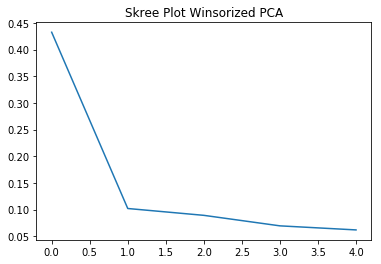

In [157]:
plt.plot(sklearn_pca.explained_variance_ratio_)
plt.title('Skree Plot Winsorized PCA')
plt.show()

## Data Exploration

In [171]:
sns.pairplot(life_df, vars=['Life_Expectancy_winsorized','Adult_Mortality_winsorized','Infant_Deaths_winsorized','Alcohol_winsorized', 'winsorized_Percentage_Exp','winsorized_HepatitisB','winsorized_Under_Five_Deaths','winsorized_Polio', 'winsorized_Tot_Exp','winsorized_Diphtheria','winsorized_HIV_AIDS','winsorized_GDP','winsorized_Population','winsorized_thinness_1to19_years','winsorized_thinness_5to9_years','winsorized_Income_Comp_Of_Resources','winsorized_Schooling'], hue='Status', palette="husl")

In [173]:
life_df.columns
#all columns 

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling',
       'Life_Expectancy_winsorized', 'Adult_Mortality_winsorized',
       'Infant_Deaths_winsorized', 'Alcohol_winsorized',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV_AIDS',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_1to19_years', 'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling', 'pca_1',
       'pca_2'],
      dtype='object')

In [176]:
columns = ['Life_Expectancy','Life_Expectancy_winsorized', 'Adult_Mortality',
       'Adult_Mortality_winsorized', 'Infant_Deaths_winsorized','Infant_Deaths', 'Alcohol','Alcohol_winsorized', 
           'Percentage_Exp','winsorized_Percentage_Exp',
           'HepatitisB','winsorized_HepatitisB','Under_Five_Deaths','winsorized_Under_Five_Deaths', 'Polio','winsorized_Polio',
           'Tot_Exp', 'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria',
       'HIV/AIDS','winsorized_HIV_AIDS', 'GDP','winsorized_GDP', 'Population','winsorized_Population', 
           'thinness_1to19_years','winsorized_thinness_1to19_years',
       'thinness_5to9_years','winsorized_thinness_5to9_years', 'Income_Comp_Of_Resources', 
           'winsorized_Income_Comp_Of_Resources', 'Schooling', 'winsorized_Schooling']    
plt.figure(figsize=(10,70))

for i in range(len(columns)):
    plt.subplot(18,2,i+1)
    plt.hist(life_df[columns[i]])
    plt.title(columns[i])
    
plt.show()
       

there appears to be some normally distributed values in Life Expectancy, 
Total Expenditure, and Schooling.

In [179]:
#life expectancy grouped by country development status

plt.figure(figsize=(5,5))
plt.bar(life_df.groupby('Status')['Status'].count().index,
        life_df.groupby('Status')['Life_Expectancy_winsorized'].mean())
plt.xlabel('Country Developement Status')
plt.ylabel('Average Life Expectancy')
plt.show()

Developed countries have, on average, higher life expectancy when compared to their developing nieghbors. 

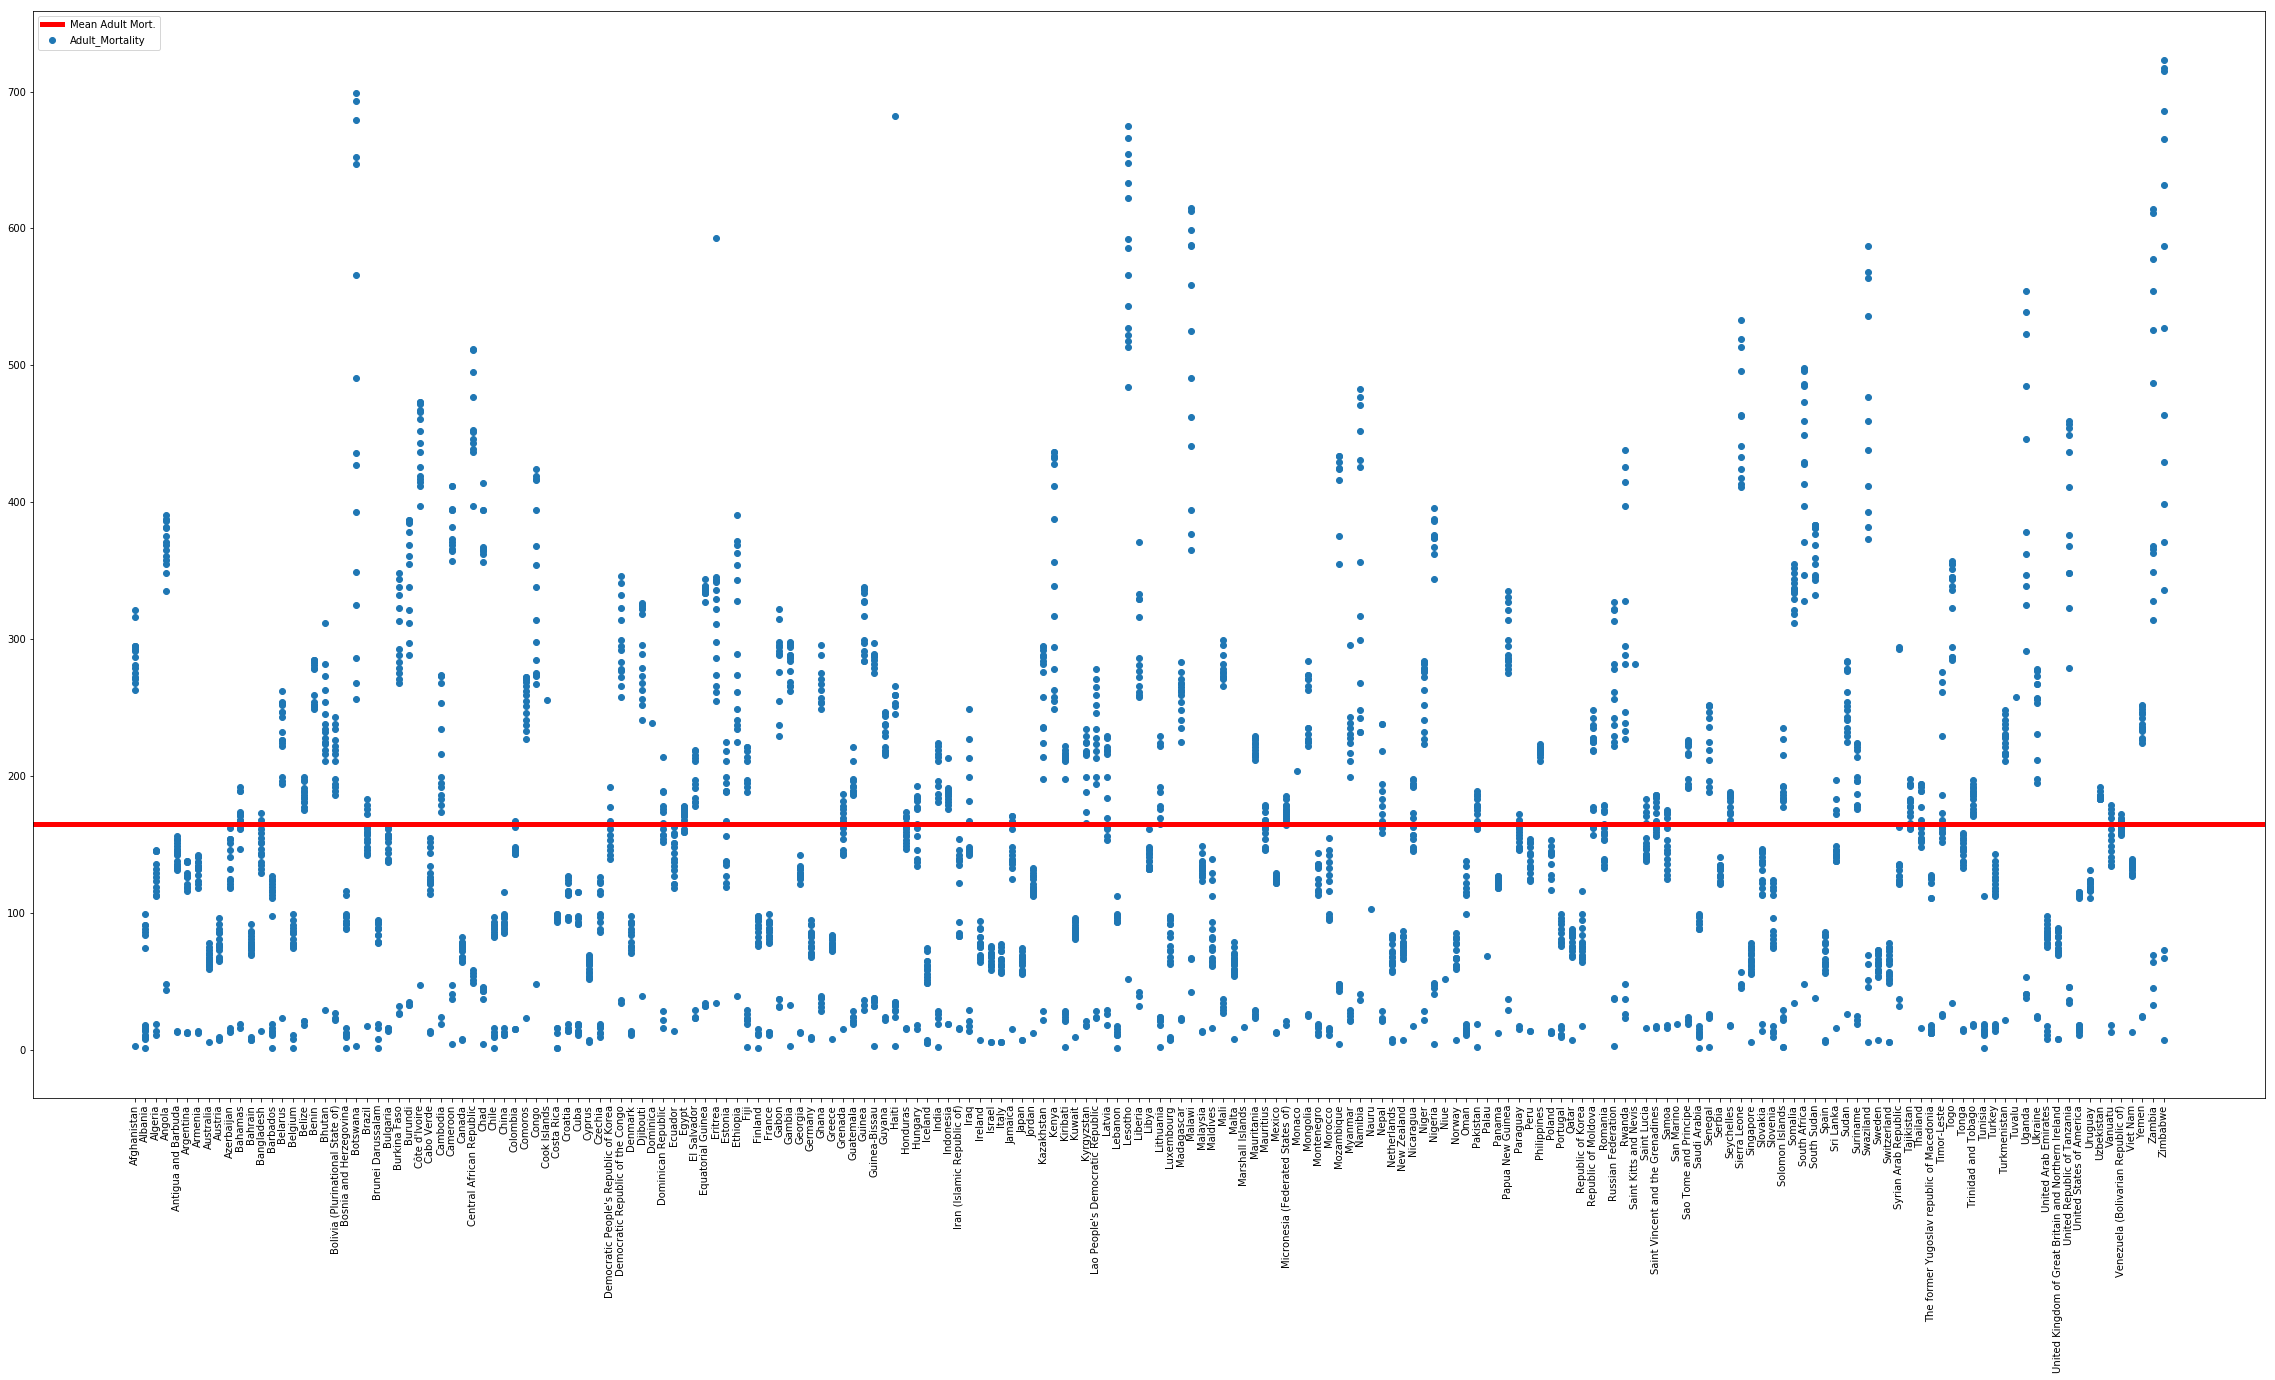

In [181]:
plt.figure(figsize=(40,20))
plt.scatter(life_df['Country'], life_df['Adult_Mortality'])
plt.axhline(life_df['Adult_Mortality'].mean(), color='red', label='Mean Adult Mort.', linestyle='solid', linewidth='5')
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.show()

In [196]:
plt.figure(figsize=(40,20))
plt.scatter(life_df['Country'], life_df['Adult_Mortality_winsorized'])
plt.axhline(life_df['Adult_Mortality_winsorized'].mean(), color='red', label='Mean Adult Mort.', linestyle='solid', linewidth='5')
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.xlabel('Country')
plt.title('Adult Mortality by Country, winsorized')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [217]:
lifebycountry = life_df.groupby('Country')['Life_Expectancy_winsorized'].mean()
lifebycountry.plot(kind='bar', figsize=(55,10))
plt.title('Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy Avg')
plt.show()

In [220]:
#life expectancy vs year
plt.figure(figsize=(10,5))
plt.bar(life_df.groupby('Year')['Year'].count().index,
       life_df.groupby('Year')['Life_Expectancy_winsorized'].mean())
plt.xlabel('Year')
plt.ylabel('Avg Life Expectancy')
plt.title('Life Expectancy with Year')
plt.show()

We see life expectancy increasing with respect to year.  Ever so slight, but every year counts!

In [222]:
f = plt.figure(figsize=(25, 20))
plt.matshow(life_df.corr(), fignum=f.number)
plt.xticks(range(life_df.shape[1]), life_df.columns[0:], fontsize=14, rotation=90)
plt.yticks(range(life_df.shape[1]), life_df.columns[0:], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16)

In [234]:
#making new table for winsorized value heatmap
life_win = life_df.iloc[:,21:]
life_win['Country'] = life_df['Country']
life_win['Year'] = life_df['Year']
life_win['Status'] = life_df['Status']
life_win_numbers = life_win.iloc[1:,:-3]
matrix = life_win_numbers.corr()

In [236]:
plt.figure(figsize=(15,15))
sns.heatmap(matrix, square=True, annot=True, linewidths=.5)
plt.title('Matrix of winsorized values')
plt.show()

In regards to life expectancy, there exist a correlation with income composition of resources as well as with schooling.

Income Comp of Resources correlated to Schooling

Thinness from 1 to 19 years and 5 to 9 years correlated

We need to look more closely at life expectancy via feature engineering.



In [237]:
life_df[['Status','Life_Expectancy']].groupby(['Status']).mean()

Life_Expectancy
Status                     
Developed         79.197852
Developing        67.107997

Developed countries show a higher life expectancy on average compared to 
developing countries.  A t-test will show if this is significant or not!

In [244]:
stats.ttest_ind(life_df.loc[life_df['Status']=='Developed','Life_Expectancy'],
               life_df.loc[life_df['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=29.83135900677773, pvalue=4.960292113465825e-171)

P value is very small, so there is a significant relationship between countries' status and life expectancy.

Schooling, HIV, Income Composition of Resources show some strong correlation to life expectancy

In [262]:
#making a new table with correlated variables
newfeatures_df = life_df[['Status','Life_Expectancy_winsorized','winsorized_HIV_AIDS', 'winsorized_Income_Comp_Of_Resources']]

In [263]:
newfeatures_df = pd.concat([newfeatures_df,pd.get_dummies(newfeatures_df['Status'], drop_first=True,)], axis=1)
newfeaturess_df = newfeatures_df.drop('Status', axis=1)
newfeaturess_df.head()

Life_Expectancy_winsorized  winsorized_HIV_AIDS  \
0                        65.0                  0.1   
1                        59.9                  0.1   
2                        59.9                  0.1   
3                        59.5                  0.1   
4                        59.2                  0.1   

   winsorized_Income_Comp_Of_Resources  Developing  
0                                0.479           1  
1                                0.476           1  
2                                0.470           1  
3                                0.463           1  
4                                0.454           1

In [266]:
newfeaturess_df.corr()

Life_Expectancy_winsorized  \
Life_Expectancy_winsorized                             1.000000   
winsorized_HIV_AIDS                                   -0.795855   
winsorized_Income_Comp_Of_Resources                    0.784959   
Developing                                            -0.483814   

                                     winsorized_HIV_AIDS  \
Life_Expectancy_winsorized                     -0.795855   
winsorized_HIV_AIDS                             1.000000   
winsorized_Income_Comp_Of_Resources            -0.591914   
Developing                                      0.292699   

                                     winsorized_Income_Comp_Of_Resources  \
Life_Expectancy_winsorized                                      0.784959   
winsorized_HIV_AIDS                                            -0.591914   
winsorized_Income_Comp_Of_Resources                             1.000000   
Developing                                                     -0.521931   

                                     Developing  
Life_Expectancy_winsorized            -0.483814  
winsorized_HIV_AIDS                    0.292699  
winsorized_Income_Comp_Of_Resources   -0.521931  
Developing                             1.000000

In [273]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = newfeatures_df[['winsorized_HIV_AIDS','Life_Expectancy_winsorized','winsorized_Income_Comp_Of_Resources']]
X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=3)
life_df["pcafinal_3"] = sklearn_pca.fit_transform(X)

print('% total variance in the winsorized dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

% total variance in the winsorized dataset explained by each component from Sklearn PCA.
 [0.81742947 0.13607141 0.04649912]
